# Mass-Observable Relation Fit

Here we fit the mu-m200 mass observable relation. We disscuss the evolution of the slope.

## Packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams.update({'font.size': 16})
#Plotting parameters
import matplotlib as mpl

mpl.rcParams['xtick.direction'], mpl.rcParams['ytick.direction'] = 'in', 'in'
mpl.rcParams['xtick.major.size'], mpl.rcParams['xtick.minor.size'] = 14, 8
mpl.rcParams['xtick.major.width'], mpl.rcParams['xtick.minor.width'] = 1.2, 0.8
mpl.rcParams['xtick.major.pad'], mpl.rcParams['xtick.minor.pad'] = 10, 10
mpl.rcParams['ytick.major.size'], mpl.rcParams['ytick.minor.size'] = 14, 8
mpl.rcParams['ytick.major.width'], mpl.rcParams['ytick.minor.width'] = 1.2, 0.8
mpl.rcParams['xtick.labelsize'], mpl.rcParams['ytick.labelsize'] = 20, 20

# Parameters used in this module
# One dictionary to store default values
# Another that user can view/change as necessary
Default_Params = {'default_cmap'   : plt.cm.coolwarm,
                  'title_fontsize' : 25,
                  'legend_fontsize': 22,
                  'xlabel_fontsize': 30,
                  'ylabel_fontsize': 30,
                  'scatter_factor' : 1.0}

Params = Default_Params.copy()

import seaborn as sns; sns.set(color_codes=True)
sns.set_style("whitegrid")

import numpy as np
from scipy.interpolate import interp1d
import scipy

import pandas as pd

In [2]:
import sys
sys.path.append("/home/s1/jesteves/git/ccopa/python/")
from main import copacabana

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load Data

In [11]:
root = '/data/des61.a/data/johnny/DESY3/projects/CopacabanaRuns/analysis/aux_files/'
cfg  = root+'config_desy3_rm.yaml'
copa = copacabana(cfg,dataset='des_y3')

master file: 
 /data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00000.hdf5
/data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00002.hdf5
/data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00256.hdf5
/data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00257.hdf5
/data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00259.hdf5
/data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00260.hdf5
/data/des61.a/data/johnny/DESY3/data/output/tiles/y3_gold_2.2.1_wide_sofcol_run_redmapper_v6.4.22_wv1.2_subsampled_copa_v2.1_00261.hdf5
/data/des61.a/data/johnny/DESY3/d

In [386]:
run_name = u'dnf_model_rhod_02Lstar_test0'
cat = copa.load_copa_out('cluster',run_name)

mask1 = (cat['redshift']<=0.65)&(cat['redshift']>0.2)#&(cat['MU']>1.)&(cat['Ngals']>1.)
mask2 = (cat['Ngals']>=1.)

print('masked fraction 1: %.5f'%(1.*np.count_nonzero(mask1)/len(cat)))
print('masked fraction 2: %.5f'%(1.*np.count_nonzero(mask2&mask1)/len(cat)))

cat  = cat[mask1&mask2] 

masked fraction 1: 0.89926
masked fraction 2: 0.85986


In [387]:
N = len(cat)
print('sample size: %i'%N)

sample size: 24487


In [411]:
from astropy.table import Table
from astropy.io.fits import getdata

# root = '/home/s1/jesteves/git/buzzardAnalysis/mainAnalysis/'
# cfg  = root+'config_buzzard_rm_v2_bcp.yaml'

# copa2 = copacabana(cfg,dataset='buzzard_v2')

run_name = u'gauss003_rhod_02Lstar'
# buz = copa2.load_copa_out('cluster',run_name)

fname = '../../../data_tmp/rm_buzzard_2.fits'
buz = Table(getdata(fname))

mask1 = (buz['redshift']<=0.65)&(buz['redshift']>0.2)#&(cat['MU']>1.)&(cat['Ngals']>1.)
mask2 = (buz['Ngals']>=1.)&(buz['Ngals_true']>=1.)

print('masked fraction 1: %.5f'%(1.*np.count_nonzero(mask1)/len(buz)))
print('masked fraction 2: %.5f'%(1.*np.count_nonzero(mask2&mask1)/len(buz)))

buz  = buz[mask1&mask2] 

masked fraction 1: 1.00000
masked fraction 2: 0.99985


### Set Variables

In [412]:
sns.set_context('talk')

In [413]:
def get_mustar_log(x):
    x = np.where(x<1.,1.,x)
    return x*1e10

In [414]:
buz

haloid,M200,LAMBDA_CHISQ,cosi,redshift,tile,MU_gauss001_rhod_02Lstar,MU_TRUE_gauss001_rhod_02Lstar,MU_ERR_JK_gauss001_rhod_02Lstar,MU_TRUE_ERR_JK_gauss001_rhod_02Lstar,Ngals_gauss001_rhod_02Lstar,Ngals_true_gauss001_rhod_02Lstar,MU_gauss003_rhod_02Lstar,MU_TRUE_gauss003_rhod_02Lstar,MU_ERR_JK_gauss003_rhod_02Lstar,MU_TRUE_ERR_JK_gauss003_rhod_02Lstar,Ngals_gauss003_rhod_02Lstar,Ngals_true_gauss003_rhod_02Lstar,MU_gauss005_rhod_02Lstar,MU_TRUE_gauss005_rhod_02Lstar,MU_ERR_JK_gauss005_rhod_02Lstar,MU_TRUE_ERR_JK_gauss005_rhod_02Lstar,Ngals_gauss005_rhod_02Lstar,Ngals_true_gauss005_rhod_02Lstar,MU_dnf_model_rhod_02Lstar,MU_TRUE_dnf_model_rhod_02Lstar,MU_ERR_JK_dnf_model_rhod_02Lstar,MU_TRUE_ERR_JK_dnf_model_rhod_02Lstar,Ngals_dnf_model_rhod_02Lstar,Ngals_true_dnf_model_rhod_02Lstar,MU,Ngals,MU_TRUE,Ngals_true,MU_ERR_JK,MU_TRUE_ERR_JK
int32,float32,float32,float64,float32,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,float64,float64
7673687,96510000000000.0,18.127123,0.0715629,0.2092558,546,125.43541477134883,185.9808919081704,41.87440064614733,51.26737171162433,18.8433295647681,27,146.78436528669982,185.9808919081704,40.80072916462485,51.37158416843865,23.78081781579697,27,150.54480912305633,185.52122536328082,39.507655379442646,51.231562673559296,23.540570321437986,26,145.68818672429282,188.49430770959276,42.02749660280722,51.7044566589921,18.740820016415128,28,146.78436528669982,23.78081781579697,185.9808919081704,27,40.80072916462485,51.37158416843865
7674995,40720000000000.0,5.618044,0.793897,0.20684066,545,0.0,48.11438540017583,0.0,32.5160919640603,0.0,8,27.253664340726804,48.11438540017583,13.010237581223759,32.41519106290403,8.475411401981013,8,27.63860476572533,56.797453997104384,10.683101973460628,33.502612301840884,9.78596761941159,10,52.83100553394368,48.11438540017583,32.71188435381518,32.30464008599104,6.212566321487131,8,27.253664340726804,8.475411401981013,48.11438540017583,8,13.010237581223759,32.41519106290403
7675586,19090000000000.0,5.2976894,0.875162,0.22029337,546,0.0,11.238965681234092,0.0,0.0,0.0,1,48.180917082546905,26.38799561128612,12.60702125544539,14.329770267023717,16.03130301876145,4,57.4544220153569,26.38799561128612,12.43274348349025,14.40294013252725,20.77371779343594,4,19.10128208346176,18.531277262308777,9.471825668504032,11.417414204118389,4.113790312680349,3,48.180917082546905,16.03130301876145,26.38799561128612,4,12.60702125544539,14.329770267023717
7676255,15670000000000.0,7.433386,0.197812,0.21231297,546,44.242585709873794,67.78688841731204,15.34214009712745,20.00400800880682,7.578754907056801,13,49.24761134336814,70.17499869791142,13.926350662322335,20.284176863932544,10.568491025900379,15,37.99338625300179,67.78688841731204,10.852186164593217,20.00400800880682,7.868725725874619,13,38.1946657505745,70.17499869791142,13.453691776055942,20.665266640889875,6.899364015884071,15,49.24761134336814,10.568491025900379,70.17499869791142,15,13.926350662322335,20.284176863932544
7691957,14940000000000.0,6.228243,0.402487,0.21912399,546,29.485003225131752,30.832736619597004,16.117864255938823,18.61820149477524,5.24213690560936,4,27.279472504406982,30.832736619597004,12.679479870062128,18.61820149477524,5.705977875373699,4,28.514710559582337,30.832736619597004,11.728045563723022,18.61820149477524,7.549480230692351,4,25.496298444913716,30.832736619597004,16.135648978367538,18.61820149477524,4.178731125625442,4,27.279472504406982,5.705977875373699,30.832736619597004,4,12.679479870062128,18.61820149477524
7692083,108900000000000.0,12.101408,0.810199,0.24170473,544,57.47253035651849,60.78931091926202,23.84100890466094,27.169484441743283,9.689380938931375,11,40.839090576798874,56.38796564547549,18.948774107840823,26.9058163459645,5.795401338757792,8,44.663744896582095,56.38796564547549,18.98967825930408,26.82934272503645,6.4051318353295

In [415]:
zcls = np.array(cat['redshift'])
lbd = np.array(cat['M200_true'])
mu    = get_mustar_log(cat['MU'])
muerr = get_mustar_log(cat['MU_ERR_JK'])


lbd2 = np.array(buz['LAMBDA_CHISQ'])
mu2    = get_mustar_log(buz['MU_%s'%run_name])
mu2err = get_mustar_log(buz['MU_ERR_JK_%s'%run_name])

In [416]:
x1= np.log10(lbd)
y1= np.log10(mu)
y1err = np.log10(muerr)

x2= np.log10(lbd2)
y2= np.log10(mu2)
y2err = np.log10(mu2err)


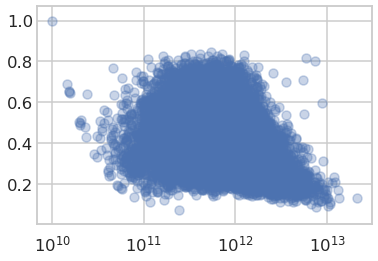

In [417]:

plt.scatter(mu,(muerr/mu),alpha=0.3)
plt.xscale('log')

(array([9.888e+03, 6.491e+03, 3.887e+03, 2.147e+03, 1.163e+03, 5.630e+02,
        2.280e+02, 8.400e+01, 2.900e+01, 7.000e+00]),
 array([0.69566375, 0.84804261, 1.00042148, 1.15280034, 1.3051792 ,
        1.45755807, 1.60993693, 1.76231579, 1.91469465, 2.06707352,
        2.21945238]),
 <a list of 10 Patch objects>)

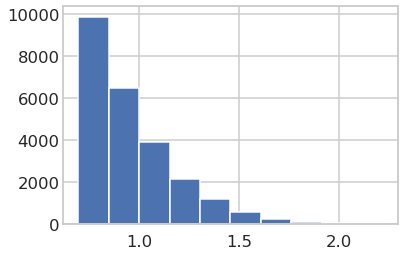

In [418]:
plt.hist(x1)

In [419]:
width = 15
xbins = np.log10(np.logspace(np.log10(5.),np.max(x1),11))
xbins2 = np.log10(np.logspace(np.log10(5.),np.max(x2),11))
# xbins = np.logspace(np.log10(5.),np.max(x),11)

In [420]:
10**xbins

array([  5.        ,   7.09607574,  10.07085817,  14.29271446,
        20.28443685,  28.78798003,  40.85633731,  57.98393277,
        82.29167567, 116.78959259, 165.74955883])

### mu-star distribution

In [421]:
ylabel = r'$ \mu_{\star} $'
xlabel = r'$ M_{200} $'

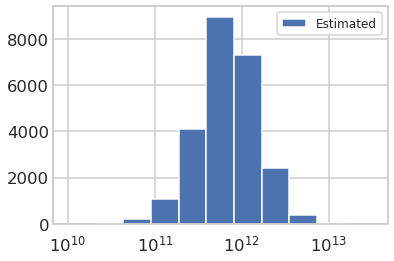

In [422]:
mulogbins = np.logspace(10,13.5,12)
a = plt.hist(mu,range=(10**10,10**13.5),bins=mulogbins,label='Estimated')
plt.xscale('log')
plt.legend(fontsize=12)

Text(0.5,1,'Observed')

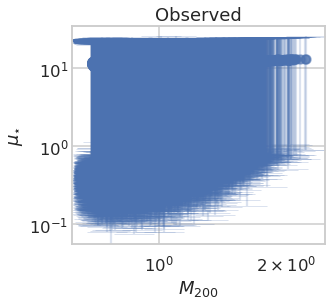

In [423]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(121)

ax.loglog()
ax.scatter(x, y1,alpha=0.5)
ax.errorbar(x, y1, yerr=y1err, ls=' ',fmt='o', markersize=8, capsize=20, alpha=0.2)
ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title('Observed')
# ax.set_xlim(10**13.5,10**15.2)
# ax.set_ylim(10**11.,10**13.8)

# ax = fig.add_subplot(122)
# ax.loglog()
# # ax.scatter(x, y2,alpha=0.5)
# ax.errorbar(x, y2, xerr=y2err, ls=' ',fmt='o', markersize=8, capsize=20, alpha=0.2)
# ax.set_xlabel(xlabel)
# ax.set_title('True')
# # ax.set_ylabel(ylabel)

# ax.set_ylim(10**11.,10**13.8)
# ax.set_xlim(10**13.5,10**15.2)

# Devolop Fit Plot Tool

In [424]:
def get_output_variables(x,y,intercept,slope,scatter,percentile=[2.5,97.5]):
    output_Data = dict()
    output_Data['x']  = x
    output_Data['y']  = np.percentile(y, 50, 0)
    output_Data['y-'] = np.percentile(y, percentile[0], 0)
    output_Data['y+'] = np.percentile(y, percentile[1], 0)

    output_Data['slope']  = np.percentile(slope, 50, 0)
    output_Data['slope-'] = np.percentile(slope, percentile[0], 0)
    output_Data['slope+'] = np.percentile(slope, percentile[1], 0)

    output_Data['scatter']  = np.percentile(scatter, 50, 0)
    output_Data['scatter-'] = np.percentile(scatter, percentile[0], 0)
    output_Data['scatter+'] = np.percentile(scatter, percentile[1], 0)
    
    output_Data['intercept']  = np.percentile(intercept, 50, 0)
    output_Data['intercept-'] = np.percentile(intercept, percentile[0], 0)
    output_Data['intercept+'] = np.percentile(intercept, percentile[1], 0)
    
    return output_Data

def func_line(x,alpha,slope):
    return alpha+slope*x

In [425]:
from collections import defaultdict
from kllr import *
import linmix

class mass_observable_relation:
    """This class perfom the fit of the mass-observable relation
    
    Parameters:
    x: indepedent variable (Cluster Mass)
    y: depedent varibale (Observable)
    y_err: error on the indepedent variable
    dataset_name: key name for the loaded dataset; used to save the temp files
    
    Functions:
    __init__()
    
    add_dataset(name,x,y,y_err=None)
    fit(name,is_log=False,bins=None,nbins=16)
    
    """
    def __init__(self):
        print('Welcome Mass-Observable Relation Fit')
        self.data  = defaultdict(dict)
    
    def add_dataset(self,name,x,y,y_err=None,y_label='y',truncate=None):
        if truncate is not None:
            yl, yh = truncate
            yc = y.copy()
            mask = (yc>yl)&(yc<yh)
            self.data[name]['delta'] = mask
            y = np.where(y<yl,yl,y)
            y = np.where(y>yh,yh,y)
            
        else:
            self.data[name]['delta'] = np.full(y.shape,True)
            
        self.data[name]['x'] = np.array(x)
        self.data[name]['y'] = np.array(y)
        
        self.data[name]['log_x']     = np.log10(np.array(x))
        self.data[name]['log_y']     = np.log10(np.array(y))
        
        if y_err is not None:
            self.data[name]['y_err']     = y_err
            self.data[name]['log_y_err'] = y_err/np.array(y)
        else:
            self.data[name]['y_err']     = None
            self.data[name]['log_y_err'] = None
        
        self.data[name]['ylabel']    = y_label
    
    def fit_kllr(self,name,is_log=False,bins=None,nbins=11,
                 kernel_type = 'gaussian', kernel_width = 0.45,fast_calc=False,
                 xrange=None, nBootstrap=100, verbose = True):
        
        ## load variables
        x, y, y_err,_ = self.get_variable(name,is_log=is_log)
        
        ## set y_err to none
        #y_err = None
        
        ## get nbins percentile
        if nbins is not None: bins = np.nanpercentile(x,np.linspace(0,100,nbins))
        
        lm = kllr_model(kernel_type = kernel_type, kernel_width = kernel_width)
        out = lm.fit(x, y, y_err, xrange, bins, nBootstrap, fast_calc, verbose)
        
        # out =  xv, y_exp, intercept_exp, slope_exp, scatter_exp
        
        ## save standard output
        ## format: x, y, y-, y+, slope, slope+, slope-, scatter, scatter-, scatter+
        self.data[name]['kllr'] = get_output_variables(*out[:5])


    def fit_linmix(self,name, nbins=11, bins=None, is_log=False, K=3, nchains=12, silent=True):
        x, y, y_err, delta = self.get_variable(name,is_log=is_log)
        
        if ((delta == False).any())&(y_err is not None):
            print('here')
            y_err[~delta] = 0.#np.nanmedian(y_err[delta])
            
        lm = linmix.LinMix(x, y, ysig=y_err, delta=delta, K=K, nchains=nchains)
        lm.run_mcmc(silent=silent)
        
        alpha, beta = lm.chain[:]['alpha'],lm.chain[:]['beta']
        scatter     = np.sqrt(lm.chain[:]['sigsqr'])

        # extend results along x-vec
        ## get nbins percentile
        #if bins is None: bins = np.nanpercentile(np.log10(x),np.linspace(0,100,nbins))
        
        ## compute out the fitted lines
        xbins= np.tile(bins,(len(alpha),1))
        ybins= func_line(xbins,alpha[:,np.newaxis],beta[:,np.newaxis])
        
        #sscatter= np.std(ybins-np.median(ybins,0))
        
        bbeta  = np.tile(beta,(len(bins),1)).T
        sscater= np.tile(scatter,(len(bins),1)).T
        aalpha = np.tile(alpha,(len(bins),1)).T
        
        ## save standard output
        ## format: x, y, y-, y+, slope, slope+, slope-, scatter, scatter-, scatter+
        self.data[name]['linmix'] = get_output_variables(bins,ybins,aalpha,bbeta,sscater)

    def get_variable(self,name,is_log=False):
        myvars = ['x','y','y_err','delta']
        
        if is_log: myvars = ['log_%s'%vi for vi in myvars]
        x = self.data[name][myvars[0]][:]
        y = self.data[name][myvars[1]][:]
        y_err = self.data[name][myvars[2]]
        delta = self.data[name]['delta']
        return x,y,y_err,delta

In [426]:
mor = mass_observable_relation()
mor.add_dataset('des_y3',x1,y1,y_label='mu_obs')
mor.add_dataset('buzzard_2',x2,y2,y_label='mu_obs')

Welcome Mass-Observable Relation Fit


In [427]:
mor.fit_kllr('des_y3',is_log=False,nbins=None,bins=xbins)
mor.fit_kllr('buzzard_2',is_log=False,nbins=None,bins=xbins2)

100%|██████████| 11/11 [00:16<00:00,  1.49s/it]


In [428]:
# mor.fit_linmix('des_y3',is_log=False,nbins=16)


In [429]:
def plot_line(x,y,ym,yp,color=None,ax=None,label="",ls='-',lw=1, fill=True):
    if ax is None: ax = plt.axes()
        
    #ax.plot(x, y, lw=6, color='k', label="")
    p = ax.plot(x, y, color=color, label=label, ls=ls, lw=lw)
    color = p[0].get_color()
    ax.scatter(x, y, color=color, lw=lw)
    if fill:
        ax.fill_between(x,ym,yp, lw=3, color=color, alpha = 0.4)
    return color
    
def plot_output(self,name,var,is_log=True,ax=None,color=None,show_data=True,show_kllr=True):
    if ax is None: ax = plt.axes()

#     linmix = self.data[name]['linmix']        
#     color  = plot_line(linmix['x'],linmix[var],linmix[var+'-'],linmix[var+'+'],
#                        ax=ax,label='',ls='--',lw=3,color=color)

    if show_kllr:
        kllr   = self.data[name]['kllr']
        _      = plot_line(kllr['x'],kllr[var],kllr[var+'-'],kllr[var+'+']
                          ,ax=ax,label=name,color=color)
        
    if (show_data) & (var=='y'):
        x,y,_,_ = self.get_variable(name,is_log=is_log)
        ax.scatter(10**x, 10**y, s=30, alpha=0.1, color=color, label="")

    return ax


In [430]:
xlabel = r'Log($\lambda_{RM}$)'
ylabel = r'Log($\mu_{\star}$)'

labels = [xlabel,ylabel]

Text(0.5,0,'Log($\\lambda_{RM}$)')

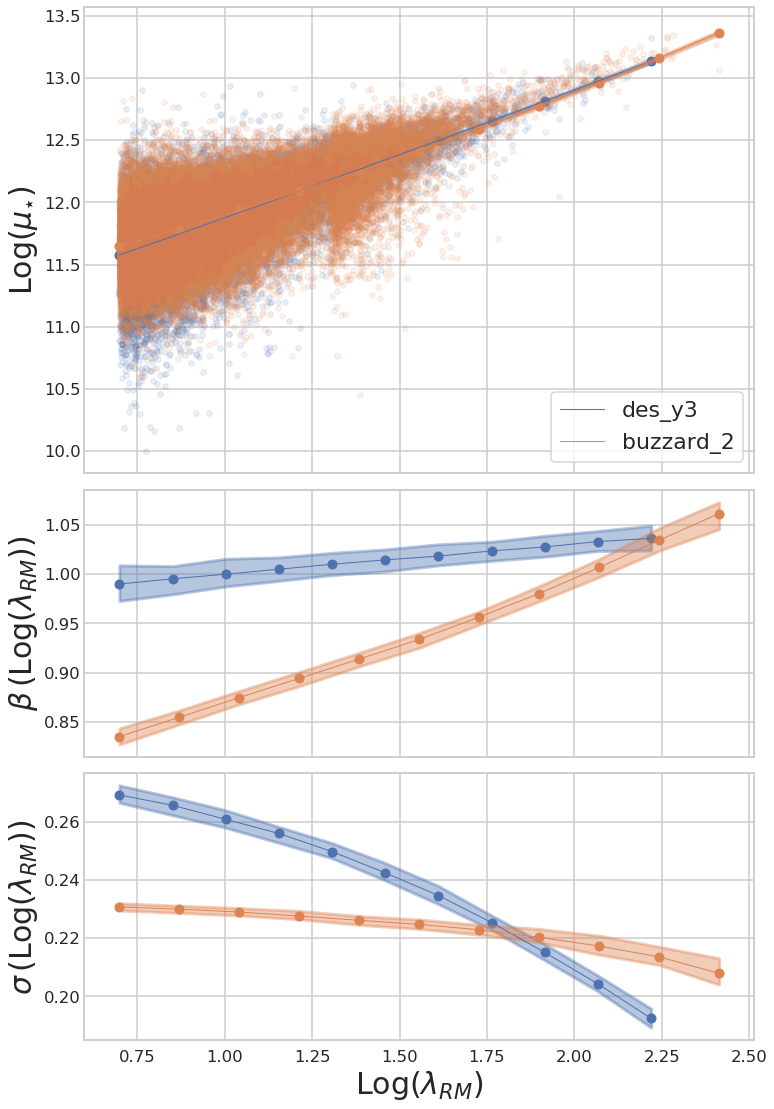

In [431]:
#Generate figure if none provided
fig, ax = plt.subplots(3, 1, figsize=(12, 19), sharex = True,
                       gridspec_kw = {'height_ratios':[1.75, 1, 1]})

plt.subplots_adjust(hspace = 0.05)

[a.grid(True) for a in ax]

plot_output(mor,'des_y3', 'y', show_data=True, ax = ax[0])
plot_output(mor,'des_y3', 'slope'  , show_data=False, ax = ax[1])
plot_output(mor,'des_y3', 'scatter', show_data=True , ax = ax[2])


plot_output(mor,'buzzard_2', 'y', show_data=True, ax = ax[0])
plot_output(mor,'buzzard_2', 'slope'  , show_data=False, ax = ax[1])
plot_output(mor,'buzzard_2', 'scatter', show_data=True , ax = ax[2])

ax[0].legend(fontsize=Params['legend_fontsize'])

ax[0].set_ylabel(labels[1], size=Params['ylabel_fontsize'])
ax[1].set_ylabel(r"$\beta\,$(%s)" % xlabel,  size=Params['ylabel_fontsize'])
ax[2].set_ylabel(r"$\sigma\,$(%s)" % xlabel, size=Params['ylabel_fontsize'])
ax[2].set_xlabel(labels[0], size=Params['xlabel_fontsize'])

In [22]:
# mor = mass_observable_relation()
mor.add_dataset('n_true',x,y3,None,y_label='n')
mor.add_dataset('n_obs',x,y4 ,None,y_label='n')

In [23]:
mor.fit_kllr('n_true'  ,is_log=True,nbins=16)
mor.fit_linmix('n_true',is_log=True,nbins=16)

mor.fit_kllr('n_obs'  ,is_log=True,nbins=16)
mor.fit_linmix('n_obs',is_log=True,nbins=16)

100%|██████████| 16/16 [00:01<00:00, 13.85it/s]


In [24]:
xlabel=r'$N_{200}$'

Text(0.5,0,'$M_{2000}$')

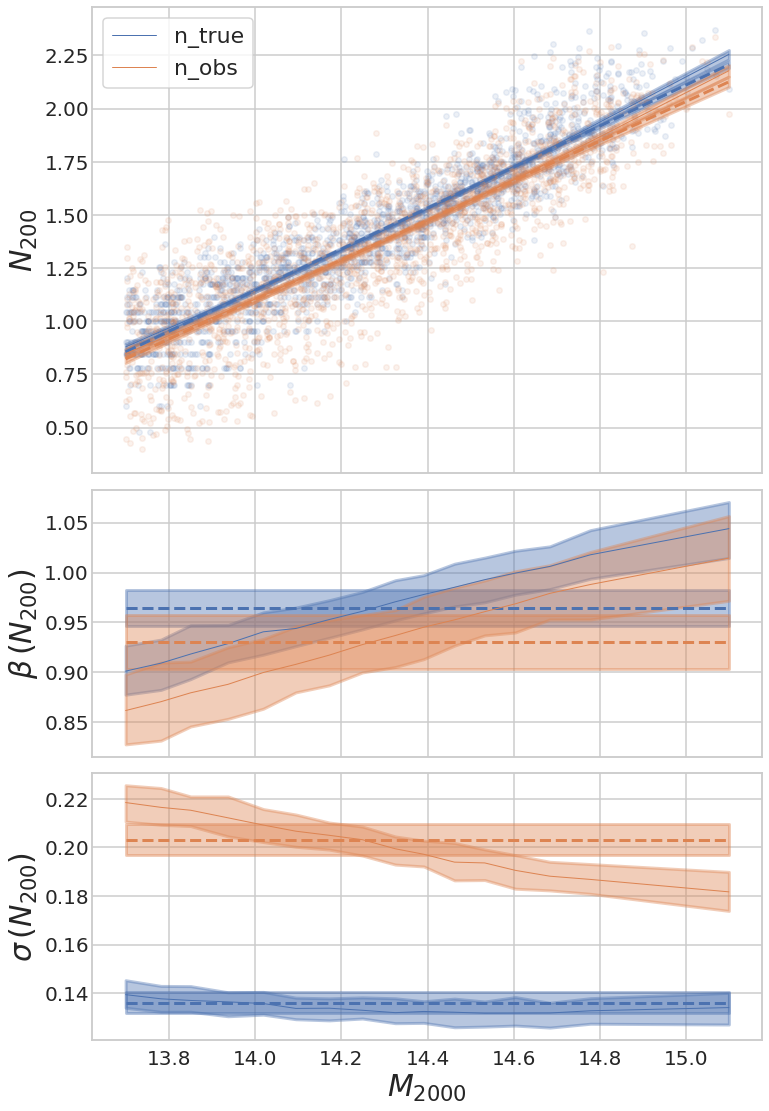

In [25]:
#Generate figure if none provided
fig, ax = plt.subplots(3, 1, figsize=(12, 19), sharex = True,
                       gridspec_kw = {'height_ratios':[1.75, 1, 1]})

plt.subplots_adjust(hspace = 0.05)

[a.grid(True) for a in ax]

plot_output(mor,'n_true', 'y', show_data=True, ax = ax[0])
plot_output(mor,'n_true', 'slope'  , show_data=False, ax = ax[1])
plot_output(mor,'n_true', 'scatter', show_data=True , ax = ax[2])

plot_output(mor,'n_obs', 'y', show_data=True, ax = ax[0])
plot_output(mor,'n_obs', 'slope'  , show_data=False, ax = ax[1])
plot_output(mor,'n_obs', 'scatter', show_data=True , ax = ax[2])
ax[0].legend(fontsize=Params['legend_fontsize'])

ax[0].set_ylabel(xlabel, size=Params['ylabel_fontsize'])
ax[1].set_ylabel(r"$\beta\,$(%s)" % xlabel,  size=Params['ylabel_fontsize'])
ax[2].set_ylabel(r"$\sigma\,$(%s)" % xlabel, size=Params['ylabel_fontsize'])
ax[2].set_xlabel(labels[0], size=Params['xlabel_fontsize'])

## Analysing all runs

In [26]:
## Load a group of runs

In [27]:
runs = [u'gauss001_r200_02Lstar_nfw',u'gauss003_r200_02Lstar_nfw',u'gauss005_r200_02Lstar_nfw',u'dnf_r200_02Lstar_nfw']
# runs += [u'gauss001_rhod_02Lstar_nfw',u'gauss003_rhod_02Lstar_nfw',u'gauss005_rhod_02Lstar_nfw',u'dnf_rhod_02Lstar_nfw']

In [28]:
catalogs = []

for run in runs:
    print('run: %s'%run)
    cat = copa.load_copa_out('cluster',run)

    mask = (cat['redshift']<0.6)&(cat['MU']>10.)&(cat['Ngals_true']>1.)

    print('masked fraction: %.2f'%(1.*np.count_nonzero(mask)/len(cat)))
    catalogs.append(cat[mask])

run: gauss001_r200_02Lstar_nfw
masked fraction: 0.63
run: gauss003_r200_02Lstar_nfw
masked fraction: 0.74
run: gauss005_r200_02Lstar_nfw
masked fraction: 0.72
run: dnf_r200_02Lstar_nfw
masked fraction: 0.71


In [29]:
datas  = defaultdict(dict)
for run,cat in zip(runs,catalogs):
    zcls = np.array(cat['redshift'])
    m200 = np.array(cat['M200_true'])

    mu    = get_mustar_log(cat['MU'])
    muerr = get_mustar_log(cat['MU_ERR_JK'])

    mut   = get_mustar_log(cat['MU_TRUE'])
    muterr= get_mustar_log(cat['MU_TRUE_ERR_JK'])

    ng    = np.array(cat['Ngals_flat'])
    ngt   = np.array(cat['Ngals_true'])

    datas[run]['x'] = m200
    datas[run]['z'] = zcls
    
    datas[run]['y1']= mu
    datas[run]['y2']= mut
    datas[run]['y1err'] = muerr
    datas[run]['y2err'] = muterr

    datas[run]['y3'] = ng
    datas[run]['y4'] = ngt        

In [30]:
## fiting

mor_all = mass_observable_relation()

for run in runs:
    mor_all.add_dataset(run,datas[run]['x'],datas[run]['y1'],datas[run]['y1err'])

Welcome Mass-Observable Relation Fit


In [31]:
for run in runs:
    print('run: %s'%run)
    mor_all.fit_kllr(run,is_log=True,nbins=16)
    mor_all.fit_linmix(run,is_log=True,nbins=16)
    print('\n')

run: gauss001_r200_02Lstar_nfw


100%|██████████| 16/16 [00:01<00:00, 13.42it/s]




run: gauss003_r200_02Lstar_nfw


100%|██████████| 16/16 [00:01<00:00, 13.91it/s]




run: gauss005_r200_02Lstar_nfw


100%|██████████| 16/16 [00:01<00:00, 13.47it/s]




run: dnf_r200_02Lstar_nfw


100%|██████████| 16/16 [00:01<00:00, 13.43it/s]


Text(0.5,0,'$M_{2000}$')

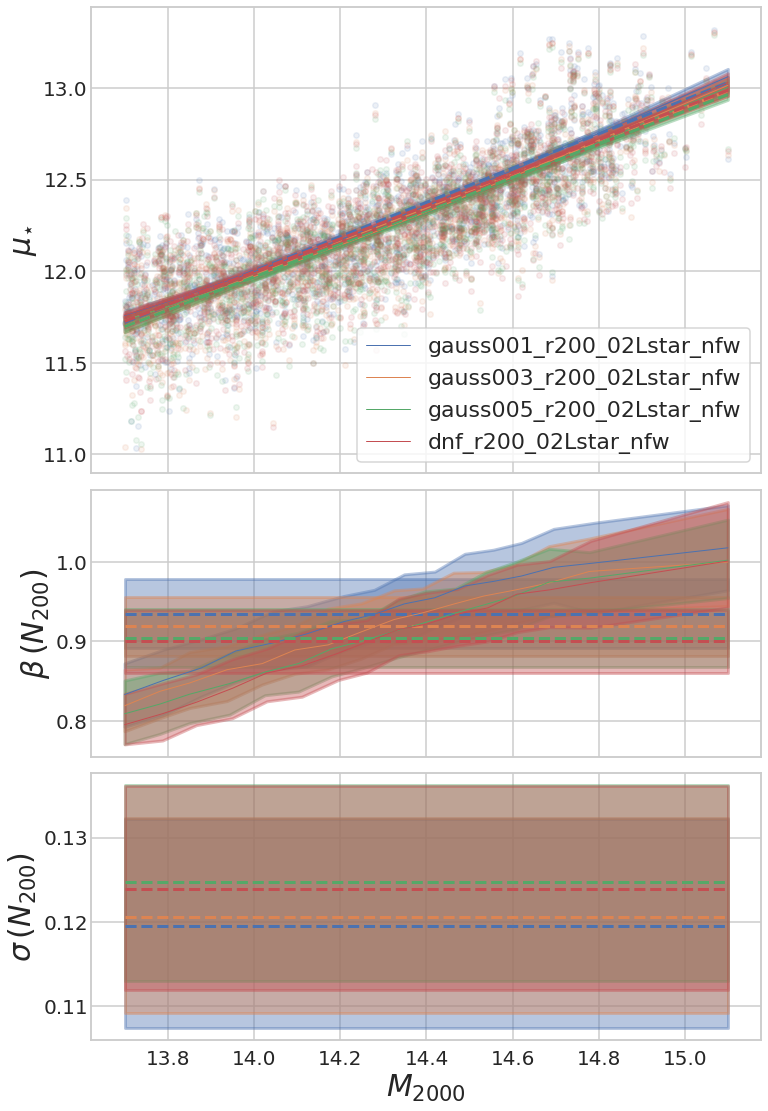

In [32]:
#Generate figure if none provided
fig, ax = plt.subplots(3, 1, figsize=(12, 19), sharex = True,
                       gridspec_kw = {'height_ratios':[1.75, 1, 1]})

plt.subplots_adjust(hspace = 0.05)

[a.grid(True) for a in ax]

for run in runs:
    plot_output(mor_all,run, 'y'      , show_data=True , ax = ax[0])
    plot_output(mor_all,run, 'slope'  , show_data=False, ax = ax[1])
    plot_output(mor_all,run, 'scatter', show_data=True , ax = ax[2])

ax[0].legend(fontsize=Params['legend_fontsize'])
ax[0].set_ylabel(labels[1], size=Params['ylabel_fontsize'])
ax[1].set_ylabel(r"$\beta\,$(%s)" % xlabel,  size=Params['ylabel_fontsize'])
ax[2].set_ylabel(r"$\sigma\,$(%s)" % xlabel, size=Params['ylabel_fontsize'])
ax[2].set_xlabel(labels[0], size=Params['xlabel_fontsize'])

Conlusion: The photo-z doesn't have major impacts on the mor when the r200 are known.

## Splitting the sample in z, $M_{200}$, $\mu_{\star}$ bins

In [28]:
def makeBin(variable, xedges):
    xbins = (xedges[1:]+xedges[:-1])/2
    indices = [ np.where((variable >= xedges[i]) & (variable <= xedges[i + 1]))[0] for i in range(len(xedges)-1)]
    return indices, xbins

In [93]:
zcls = np.array(cat['redshift'])
m200 = np.array(cat['M200_true'])
mu   = get_mustar_log(cat['MU'])

In [110]:
zbins = np.percentile(zcls,[0,25,75,100])
zkeys, zmed = makeBin(zcls,zbins)
zlabel = [r'%.3f < z < %.3f'%(zl,zh) for zl,zh in zip(zbins[:-1],zbins[1:])]
# zlabel = ['zbin_%i'%i for i in range(len(zmed))]

In [111]:
zlabel

['0.100 < z < 0.239', '0.239 < z < 0.471', '0.471 < z < 0.600']

In [112]:
for zl, idx in zip(zlabel, zkeys):
    mor.add_dataset('obs.: '+zl, x[idx], y1[idx], y1err[idx], y_label='mu')
    mor.add_dataset('true: '+zl, x[idx], y2[idx], y2err[idx], y_label='mu_true')

In [113]:
for zl in zlabel:
    print('run: %s'%zl)
    mor.fit_kllr('obs.: '+zl,is_log=True,nbins=16)
    mor.fit_kllr('true: '+zl,is_log=True,nbins=16)
    mor.fit_linmix('obs.: '+zl,is_log=True,nbins=16)
    mor.fit_linmix('true: '+zl,is_log=True,nbins=16)
    print('\n')

run: 0.100 < z < 0.239


100%|██████████| 16/16 [00:01<00:00, 15.39it/s]




run: 0.239 < z < 0.471


100%|██████████| 16/16 [00:01<00:00, 14.13it/s]




run: 0.471 < z < 0.600


100%|██████████| 16/16 [00:01<00:00, 15.45it/s]


Text(0.5,0,'$M_{2000}$')

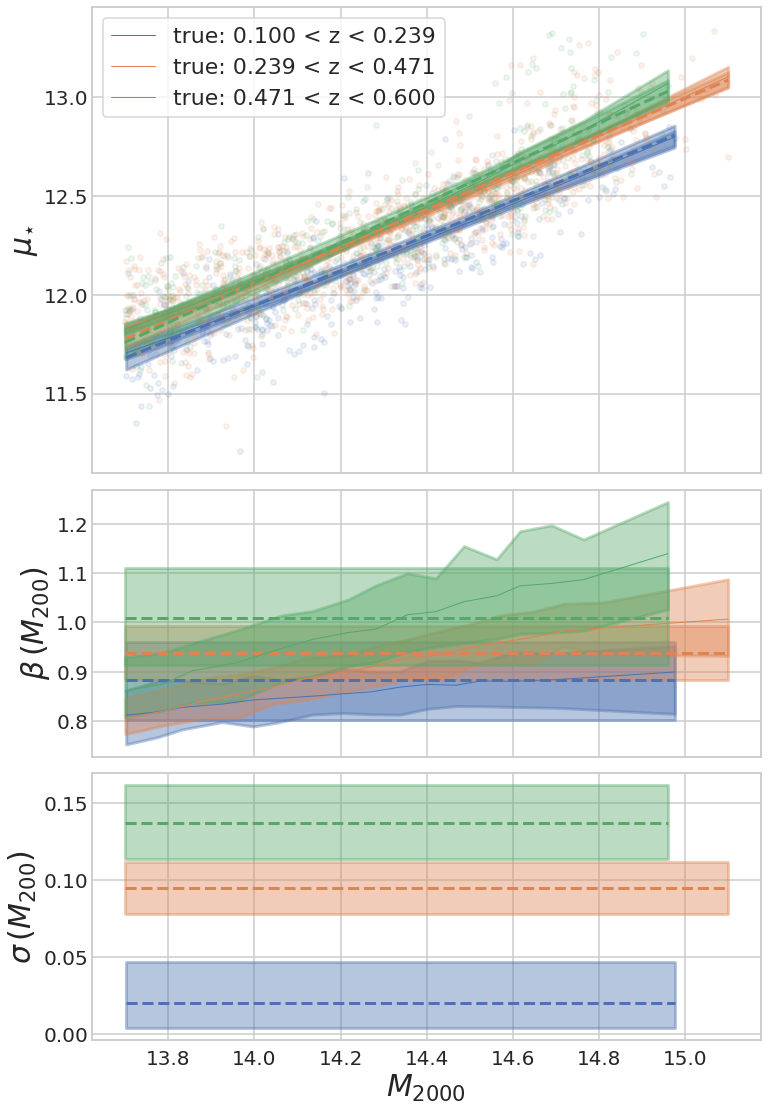

In [142]:
#Generate figure if none provided
fig, ax = plt.subplots(3, 1, figsize=(12, 19), sharex = True,
                       gridspec_kw = {'height_ratios':[1.75, 1, 1]})

plt.subplots_adjust(hspace = 0.05)

[a.grid(True) for a in ax]

for run in zlabel:
#     plot_output(mor,'obs.: '+run, 'y'      , show_data=True , ax = ax[0])
#     plot_output(mor,'obs.: '+run, 'slope'  , show_data=False, ax = ax[1])
#     plot_output(mor,'obs.: '+run, 'scatter', show_data=False , ax = ax[2])

    plot_output(mor,'true: '+run, 'y'      , show_data=True , ax = ax[0])
    plot_output(mor,'true: '+run, 'slope'  , show_data=False, ax = ax[1])
    plot_output(mor,'true: '+run, 'scatter', show_data=False , ax = ax[2])

ax[0].legend(fontsize=Params['legend_fontsize'])
ax[0].set_ylabel(labels[1], size=Params['ylabel_fontsize'])
ax[1].set_ylabel(r"$\beta\,$(%s)" % xlabel,  size=Params['ylabel_fontsize'])
ax[2].set_ylabel(r"$\sigma\,$(%s)" % xlabel, size=Params['ylabel_fontsize'])
ax[2].set_xlabel(labels[0], size=Params['xlabel_fontsize'])

### $M_{200}$

In [83]:
mbins = np.percentile(m200,[0,25,75,100])
mkeys, mmed = makeBin(m200,mbins)
mlabel = [r'%.3f < $log(M_{200})$ < %.3f'%(zl,zh) for zl,zh in zip(np.log10(mbins[:-1]),np.log10(mbins[1:]))]
# zlabel = ['zbin_%i'%i for i in range(len(zmed))]

In [84]:
mlabel

['13.699 < $log(M_{200})$ < 14.001',
 '14.001 < $log(M_{200})$ < 14.551',
 '14.551 < $log(M_{200})$ < 15.100']

In [85]:
for zl, idx in zip(mlabel, mkeys):
    mor.add_dataset('obs.: '+zl, x[idx], y1[idx], y1err[idx], y_label='mu')
    mor.add_dataset('true: '+zl, x[idx], y2[idx], y2err[idx], y_label='mu_true')

In [119]:
for zl in mlabel:
    print('run: %s'%zl)
    mor.fit_kllr('obs.: '+zl,is_log=True,nbins=16)
    mor.fit_kllr('true: '+zl,is_log=True,nbins=16)
    mor.fit_linmix('obs.: '+zl,is_log=True,nbins=16)
    mor.fit_linmix('true: '+zl,is_log=True,nbins=16)
    print('\n')

run: 13.699 < $log(M_{200})$ < 14.012


100%|██████████| 16/16 [00:01<00:00, 15.38it/s]




run: 14.012 < $log(M_{200})$ < 14.555


100%|██████████| 16/16 [00:01<00:00, 14.45it/s]




run: 14.555 < $log(M_{200})$ < 15.100


100%|██████████| 16/16 [00:01<00:00, 15.51it/s]


Text(0.5,0,'$M_{2000}$')

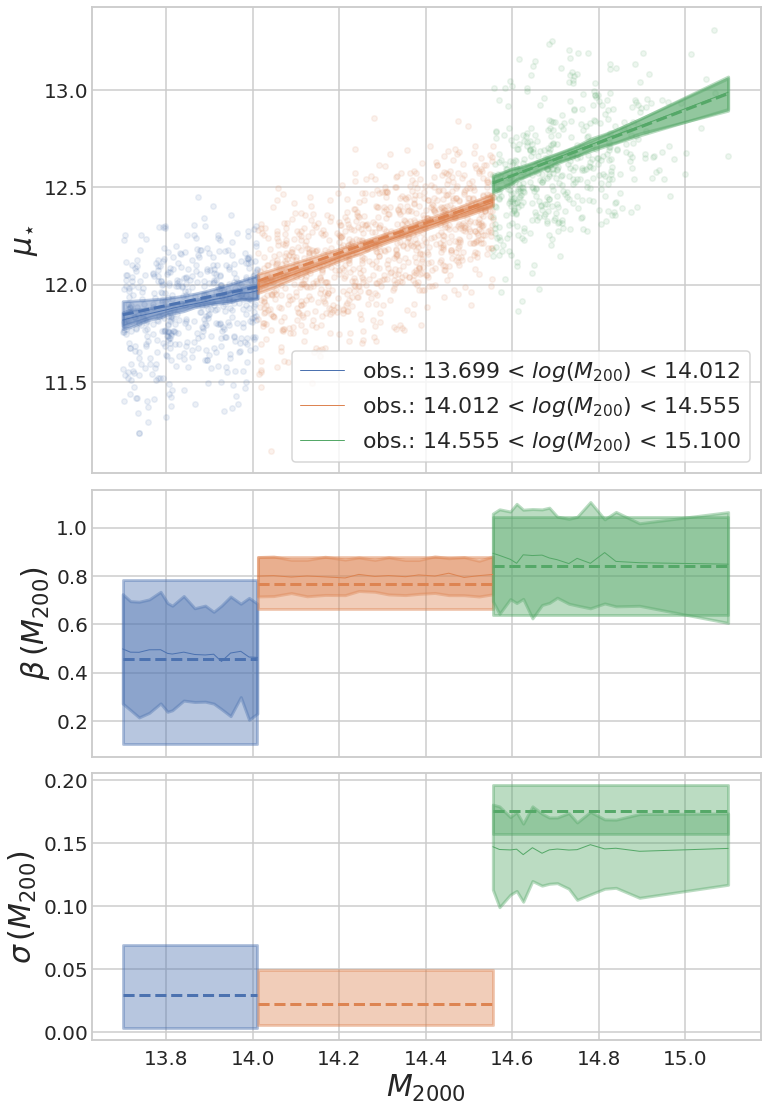

In [141]:
#Generate figure if none provided
fig, ax = plt.subplots(3, 1, figsize=(12, 19), sharex = True,
                       gridspec_kw = {'height_ratios':[1.75, 1, 1]})

plt.subplots_adjust(hspace = 0.05)

[a.grid(True) for a in ax]

for run in mlabel:
    plot_output(mor,'obs.: '+run, 'y'      , show_data=True , ax = ax[0])
    plot_output(mor,'obs.: '+run, 'slope'  , show_data=False, ax = ax[1])
    plot_output(mor,'obs.: '+run, 'scatter', show_data=False, ax = ax[2])

#     plot_output(mor,'true: '+run, 'y'      , show_data=True , ax = ax[0])
#     plot_output(mor,'true: '+run, 'slope'  , show_data=False, ax = ax[1])
#     plot_output(mor,'true: '+run, 'scatter', show_data=True , ax = ax[2])

ax[0].legend(fontsize=Params['legend_fontsize'])
ax[0].set_ylabel(labels[1], size=Params['ylabel_fontsize'])
ax[1].set_ylabel(r"$\beta\,$(%s)" % xlabel,  size=Params['ylabel_fontsize'])
ax[2].set_ylabel(r"$\sigma\,$(%s)" % xlabel, size=Params['ylabel_fontsize'])
ax[2].set_xlabel(labels[0], size=Params['xlabel_fontsize'])

### $\mu_{\star}$

In [116]:
msbins = np.percentile(mu,[0,25,75,100])
mskeys, msmed = makeBin(mu,msbins)
mslabel = [r'%.3f < $log(\mu_{\star})$ < %.3f'%(zl,zh) for zl,zh in zip(np.log10(msbins[:-1]),np.log10(msbins[1:]))]
# zlabel = ['zbin_%i'%i for i in range(len(zmed))]

In [117]:
mslabel

['11.027 < $log(\\mu_{\\star})$ < 11.947',
 '11.947 < $log(\\mu_{\\star})$ < 12.437',
 '12.437 < $log(\\mu_{\\star})$ < 13.302']

In [118]:
for zl, idx, ml, mh in zip(mslabel, mskeys, msbins[:-1], msbins[1:]):
    mor.add_dataset('obs.: '+zl, x, y1.copy(), y1err, y_label='mu', truncate=(ml,mh))
    mor.add_dataset('true: '+zl, x, y2.copy(), y2err, y_label='mu_true', truncate=(ml,mh))

In [124]:
#plt.hist(mor.data['obs.: '+mslabel[1]]['log_y'])

In [125]:
for zl in mslabel:
    print('run: %s'%zl)
    mor.fit_kllr('obs.: '+zl,is_log=True,nbins=16)
    #mor.fit_kllr('true: '+zl,is_log=True,nbins=16)
    mor.fit_linmix('obs.: '+zl,is_log=True,nbins=16,K=2)
    #mor.fit_linmix('true: '+zl,is_log=True,nbins=16)
    print('\n')

run: 11.027 < $log(\mu_{\star})$ < 11.947


100%|██████████| 16/16 [00:01<00:00, 11.87it/s]

here




run: 11.947 < $log(\mu_{\star})$ < 12.437


100%|██████████| 16/16 [00:01<00:00, 12.30it/s]

here




run: 12.437 < $log(\mu_{\star})$ < 13.302


100%|██████████| 16/16 [00:01<00:00, 12.42it/s]


here




Text(0.5,0,'$M_{2000}$')

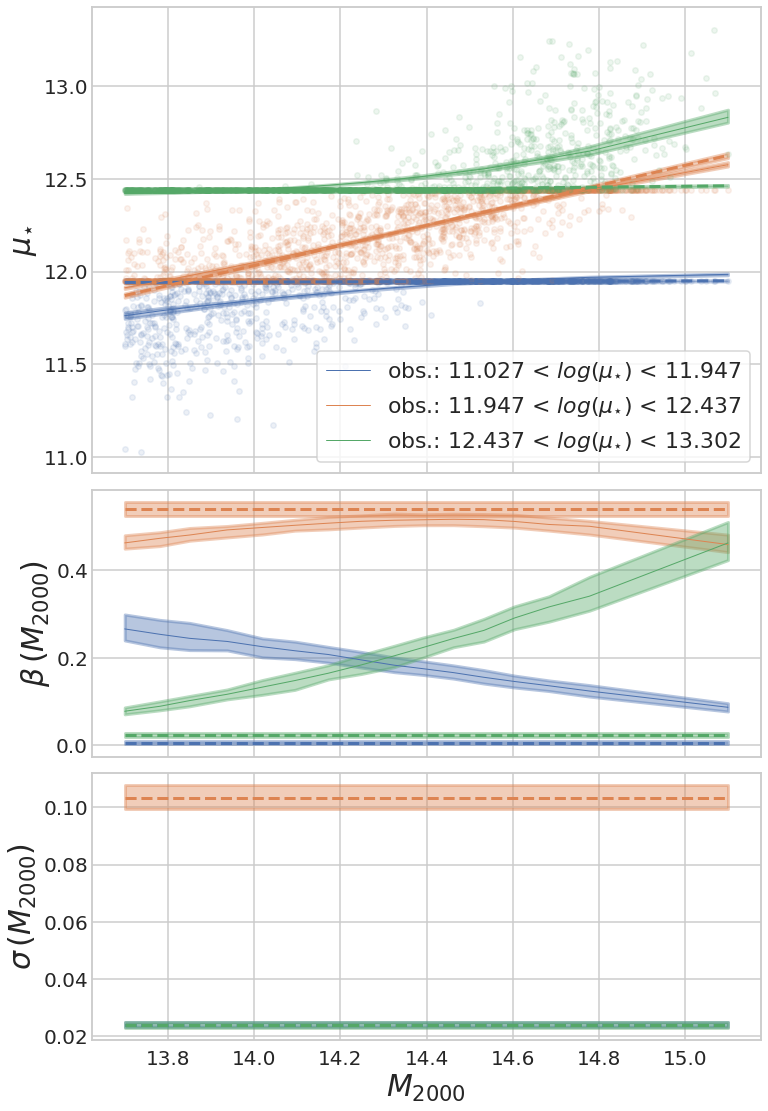

In [144]:
#Generate figure if none provided
fig, ax = plt.subplots(3, 1, figsize=(12, 19), sharex = True,
                       gridspec_kw = {'height_ratios':[1.75, 1, 1]})

plt.subplots_adjust(hspace = 0.05)

[a.grid(True) for a in ax]

for run in mslabel:
    plot_output(mor,'obs.: '+run, 'y'      , show_data=True , ax = ax[0], show_kllr=True)
    plot_output(mor,'obs.: '+run, 'slope'  , show_data=False, ax = ax[1], show_kllr=True)
    plot_output(mor,'obs.: '+run, 'scatter', show_data=False, ax = ax[2], show_kllr=True)

#     plot_output(mor,'true: '+run, 'y'      , show_data=True , ax = ax[0])
#     plot_output(mor,'true: '+run, 'slope'  , show_data=False, ax = ax[1])
#     plot_output(mor,'true: '+run, 'scatter', show_data=True , ax = ax[2])

ax[0].legend(fontsize=Params['legend_fontsize'])
ax[0].set_ylabel(labels[1], size=Params['ylabel_fontsize'])
ax[1].set_ylabel(r"$\beta\,$(%s)" % xlabel,  size=Params['ylabel_fontsize'])
ax[2].set_ylabel(r"$\sigma\,$(%s)" % xlabel, size=Params['ylabel_fontsize'])
ax[2].set_xlabel(labels[0], size=Params['xlabel_fontsize'])

In [132]:
name='obs.: '+mslabel[2]

In [133]:
np.count_nonzero(mor.data[name]['delta'])

484

In [ ]:
## check Maria's bin choice

In [63]:
'm200_bin_0/1/3'
'mu_bin_0/1/3'
'z_bin_0/1/3'

'z_bin_0/1/3'

## Fit Linear Relation

### Linmix 

A Bayesian approach to linear regression with errors in both X and Y.

In [63]:
from kllr import *
import linmix

In [64]:
help(linmix.LinMix)

Help on class LinMix in module linmix.linmix:

class LinMix(__builtin__.object)
 |  A class to perform linear regression of `y` on `x` when there are measurement errors in
 |  both variables.  The regression assumes:
 |  
 |  eta = alpha + beta * xi + epsilon
 |  
 |  x = xi + xerr
 |  
 |  y = eta + yerr
 |  
 |  Here, `alpha` and `beta` are the regression coefficients, `epsilon` is the intrinsic random
 |  scatter about the regression, `xerr` is the measurement error in `x`, and `yerr` is the
 |  measurement error in `y`.  `epsilon` is assumed to be normally-distributed with mean zero and
 |  variance `sigsqr`.  `xerr` and `yerr` are assumed to be normally-distributed with means equal
 |  to zero, variances `xsig`^2 and `ysig`^2, respectively, and covariance `xycov`. The
 |  distribution of `xi` is modelled as a mixture of normals, with group proportions `pi`, means
 |  `mu`, and variances `tausqr`.
 |  
 |  Args:
 |      x(array_like): The observed independent variable.
 |      y(ar

In [139]:
y        = y1.copy()
truncate = msbins[1], msbins[2]

In [140]:
if truncate is not None:
    yl, yh = truncate
    y = np.where(y>yh,yh,y)
    y = np.where(y<yl,yl,y)
    delta = (y>yl)&(y<yh)
else:
    delta = np.full(y.shape,True)

In [141]:
y1err[~delta] = 0.#np.nanmedian(y1err[delta])

lm1 = linmix.LinMix(np.log10(x), np.log10(y), ysig=y1err/y1, delta=delta, K=3)
lm1.run_mcmc(silent=True)

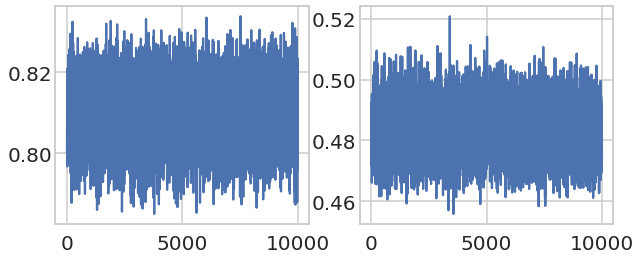

In [142]:
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(121)
ax.plot(lm1.chain[:]['corr'])


ax = fig.add_subplot(122)
ax.plot(lm1.chain[:]['beta'])


In [60]:
yl,yh

(106510032618.53673, 884117198225.7083)

In [232]:
alpha, beta = lm1.chain[:]['alpha'][:,np.newaxis],lm1.chain[:]['beta'][:,np.newaxis]
scatter =  lm1.chain[:]['sigsqr'][:,np.newaxis]

In [233]:
xmin,xmax=np.min(np.log10(x)),np.max(np.log10(x))
bins = np.linspace(xmin,xmax,21)

alpha, beta = lm1.chain[:]['alpha'],lm1.chain[:]['beta']
scatter =  lm1.chain[:]['sigsqr']

xbins= np.tile(bins,(len(alpha),1))
ybins= func_line(xbins,alpha[:,np.newaxis],beta[:,np.newaxis])

bbeta  = np.tile(beta,(len(bins),1)).T
sscater= np.tile(scatter,(len(bins),1)).T

#get_output_variables(bins,ybins,bbeta,sscater,percentile=[16,84])

In [228]:
# plt.scatter(bins,np.percentile(ybins-np.median(ybins,0),16,axis=0))
# plt.scatter(bins,np.percentile(ybins-np.median(ybins,0),84,axis=0))

In [97]:
ybins.shape

(30000, 21)

In [98]:
xbins.shape

(30000, 21)

In [111]:
bbeta.shape

(30000, 21)

In [113]:
get_output_variables(bins,ybins,bbeta,sscater,percentile=[16,84])

{'scatter': array([0.01455396, 0.01455396, 0.01455396, 0.01455396, 0.01455396,
        0.01455396, 0.01455396, 0.01455396, 0.01455396, 0.01455396,
        0.01455396, 0.01455396, 0.01455396, 0.01455396, 0.01455396,
        0.01455396, 0.01455396, 0.01455396, 0.01455396, 0.01455396,
        0.01455396]),
 'scatter+': array([0.01604473, 0.01604473, 0.01604473, 0.01604473, 0.01604473,
        0.01604473, 0.01604473, 0.01604473, 0.01604473, 0.01604473,
        0.01604473, 0.01604473, 0.01604473, 0.01604473, 0.01604473,
        0.01604473, 0.01604473, 0.01604473, 0.01604473, 0.01604473,
        0.01604473]),
 'scatter-': array([0.01319259, 0.01319259, 0.01319259, 0.01319259, 0.01319259,
        0.01319259, 0.01319259, 0.01319259, 0.01319259, 0.01319259,
        0.01319259, 0.01319259, 0.01319259, 0.01319259, 0.01319259,
        0.01319259, 0.01319259, 0.01319259, 0.01319259, 0.01319259,
        0.01319259]),
 'slope': array([0.91809393, 0.91809393, 0.91809393, 0.91809393, 0.91809393,
      

In [75]:
get_output_variables(bins,y,slope,scatter,percentile=[16,84])

array([0.01686345, 0.01581595, 0.01466724, ..., 0.01679384, 0.01592152,
       0.01589498])

In [69]:
def get_output_variables(x,y,slope,scatter,percentile=[16,84]):
    output_Data = dict()
    output_Data['x']  = x
    output_Data['y']  = np.percentile(y, 50, 0)
    output_Data['y-'] = np.percentile(y, percentile[0], 0)
    output_Data['y+'] = np.percentile(y, percentile[1], 0)

    output_Data['slope']  = np.percentile(slope, 50, 0)
    output_Data['slope-'] = np.percentile(slope, percentile[0], 0)
    output_Data['slope+'] = np.percentile(slope, percentile[1], 0)

    output_Data['scatter']  = np.percentile(scatter, 50, 0)
    output_Data['scatter-'] = np.percentile(scatter, percentile[0], 0)
    output_Data['scatter+'] = np.percentile(scatter, percentile[1], 0)
    return output_Data

In [ ]:
lm2 = linmix.LinMix(x, y2, ysig=y2err, K=3, nchains=12)
lm2.run_mcmc(silent=True)

NameError: name 'lm2' is not defined

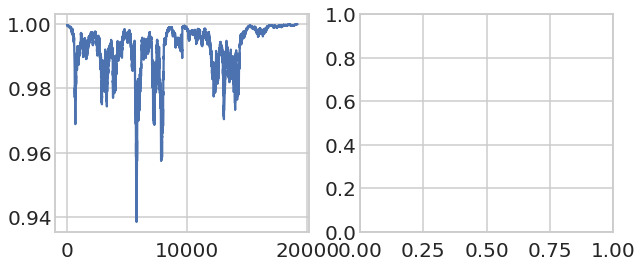

In [234]:
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(121)
ax.plot(lm1.chain[:]['corr'])

ax = fig.add_subplot(122)
ax.plot(lm2.chain[:]['corr'])

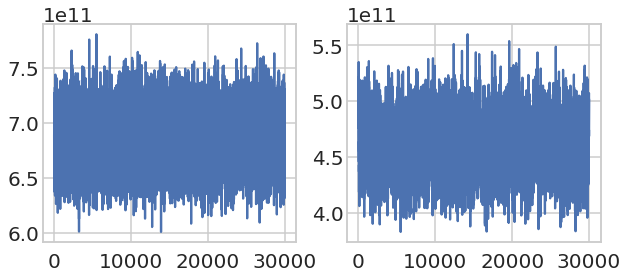

In [22]:
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(121)
ax.plot(np.sqrt(lm1.chain[:]['sigsqr']))

ax = fig.add_subplot(122)
ax.plot(np.sqrt(lm2.chain[:]['sigsqr']))

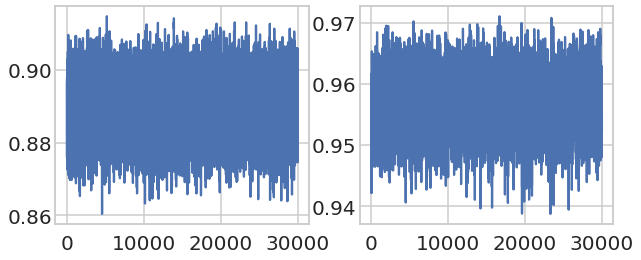

In [23]:
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(121)
ax.plot(lm1.chain[:]['corr'])

ax = fig.add_subplot(122)
ax.plot(lm2.chain[:]['corr'])

In [24]:
lm2.chain[:].dtype

dtype([('alpha', '<f8'), ('beta', '<f8'), ('sigsqr', '<f8'), ('pi', '<f8', (3,)), ('mu', '<f8', (3,)), ('tausqr', '<f8', (3,)), ('mu0', '<f8'), ('usqr', '<f8'), ('wsqr', '<f8'), ('ximean', '<f8'), ('xisig', '<f8'), ('corr', '<f8')])

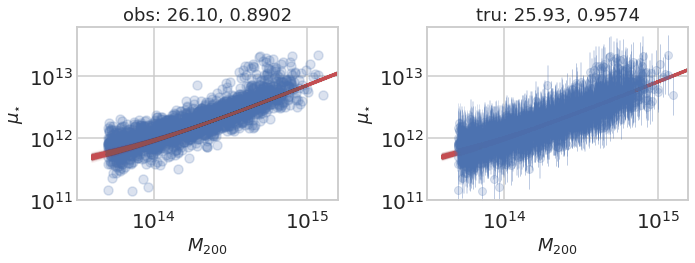

In [25]:
fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(121)
ax.loglog()
ax.scatter(x, y2, alpha=0.2)
# ax.errorbar(x, y2, xerr=y2err, ls=' ',fmt='o', markersize=8, capsize=20, alpha=0.2)
    
xs = np.linspace(10**13.6,10**15.2,100)
for i in range(0, len(lm1.chain), 50):
    #logxs = np.linspace(np.log(10**13.6),np.log(10**15.2),100)
    #logys = lm2a.chain[i]['alpha'] + logxs * lm2a.chain[i]['beta']
    #xs, ys = np.exp(logxs), np.exp(logys)
    ys = lm1.chain[i]['alpha'] + xs * lm1.chain[i]['beta']
    ax.plot(xs, ys, color='r', alpha=0.02)

ax.set_ylim(10**11.,10**13.8)
ax.set_xlim(10**13.5,10**15.2)

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title('obs: %.2f, %.4f'%(np.log(np.mean(lm1.chain[:]['alpha'])),np.mean(lm1.chain[:]['corr'])))

ax = fig.add_subplot(122)
ax.loglog()
# ax.scatter(x, y2, alpha=0.2)
ax.errorbar(x, y2, xerr=y2err, ls=' ',fmt='o', markersize=8, capsize=20, alpha=0.2)
    
xs = np.linspace(10**13.6,10**15.2,100)
for i in range(0, len(lm2.chain), 50):
    #logxs = np.linspace(np.log(10**13.6),np.log(10**15.2),100)
    #logys = lm2b.chain[i]['alpha'] + logxs * lm2b.chain[i]['beta']
    #xs, ys = np.exp(logxs), np.exp(logys)
    ys = lm2.chain[i]['alpha'] + xs * lm2.chain[i]['beta']
    ax.plot(xs, ys, color='r', alpha=0.02)

ax.set_ylim(10**11.,10**13.8)
ax.set_xlim(10**13.5,10**15.2)

ax.set_xlabel(xlabel)
ax.set_ylabel(ylabel)
ax.set_title('tru: %.2f, %.4f'%(np.mean(np.log(lm2.chain[:]['alpha'])),np.mean(lm2.chain[:]['corr'])))

fig.tight_layout()

In [89]:
def get_mean_error(yt,x,slope,intecept):
    dof = len(x)-1
    err = np.sum((yt-x*slope+intecept)**2,axis=0)/dof
    return np.sqrt(err)

In [97]:
slopes, intercept = lm1.chain[:]['beta'], lm1.chain[:]['alpha']

slopes   = np.tile(slopes,(len(x),1))
intercept= np.tile(intercept,(len(x),1))

xx = np.tile(np.array(x).copy(),(len(lm1.chain[:]),1)).T
yy1= np.tile(np.array(y1).copy(),(len(lm1.chain[:]),1)).T

dof = len(x)-1
err = np.sqrt(np.sum((np.log10(yy1)-np.log10(xx*slopes+intercept))**2,axis=0)/dof)

In [98]:
err

array([0.20302041, 0.20321125, 0.20328044, ..., 0.20301694, 0.20325678,
       0.20297026])

In [99]:
def get_stats(x):
    x16,x50,x84 = np.percentile(x,[16,50,84])
    s68 = (x84-x16)/2.
    return np.array([x50,x16,x84,s68])

def get_chain_results(self):
    metrics = ['alpha','beta','corr']
    
    out = dict().fromkeys(metrics)
    
    for mi in metrics:
        out[mi] = get_stats(self.chain[:][mi])
        
    return out

In [100]:
res = get_chain_results(lm1)

In [101]:
res['sig'] = get_stats(err)

In [102]:
res

{'alpha': array([2.15615913e+11, 1.85292776e+11, 2.45542010e+11, 3.01246169e+10]),
 'beta': array([0.00693486, 0.00682198, 0.00705135, 0.00011468]),
 'corr': array([0.8904541, 0.8836262, 0.8969908, 0.0066823]),
 'sig': array([0.20316743, 0.20300859, 0.20362759, 0.0003095 ])}

### KLLR

Kernel Localized Linear Regresion

In [86]:
from kllr import *

In [87]:
S = np.zeros((6, N))

S[0] = m200
S[1] = mu
S[2] = mut
S[3] = mu/muerr#/mu
S[4] = mut/muterr#/mut
S[5] = zcls

df = pd.DataFrame(S.T, columns = ['x', 'y1', 'y2','y1err','y2err','z'])

In [88]:
#df.to_csv('mor_mustar_g003_r200.csv')

In [89]:
# df = pd.read_csv('mor_mustar_g003_r200.csv')

for var in ['x','y1','y2']:
    df['log_%s'%var] = np.log10(df[var])

In [90]:
help(kllr_model.fit)

Help on method fit in module kllr.regression_model:

fit(self, X, y, y_err=None, xrange=None, bins=25, nBootstrap=100, fast_calc=False, verbose=False, compute_skewness=False, compute_kurtosis=False, kernel_type=None, kernel_width=None) unbound kllr.regression_model.kllr_model method
    This function computes the local regression parameters at the points within xrange.
    
    Parameters
    ----------
    x : numpy array
        Independent variable data vector. This version only support a one dimensional data vector.
    
    y : numpy array
        Dependent variable data vector. This version only support a one dimensional data vector.
    
    y_err : numpy array, optional
        Uncertainty on dependent variable, y.
        Must contain only non-zero positive values.
        Default is None.
    
    xrange : list, optional
        The first element is the min and the second element is the max,
        If None, it sets xrange to [min(x), max(x)]
    
    bins : int, optional
   

In [91]:
#! pip install --upgrade --user pandas

In [92]:
df['log_y1err'] = y1err/y1
df['log_y2err'] = y2err/y2

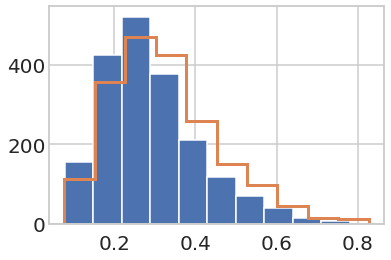

In [93]:
df['log_y1err'].hist()
df['log_y2err'].hist(histtype='step',lw=3)

In [94]:
import pandas as pd
print(pd.__version__)

0.24.2


In [95]:
mybins = np.percentile(np.array(df['log_x']),np.linspace(0,100,16))

In [96]:
lm = kllr_model(kernel_type = 'gaussian', kernel_width = 0.45)

out = lm.fit(df['log_x'], df['log_y1'], y_err=None, bins=mybins)

xv, y_exp, intercept_exp, slope_exp, scatter_exp, _, _= out

In [98]:
np.median(slope_exp,0)

array([0.78638581, 0.79708938, 0.80878157, 0.81864464, 0.83033779,
       0.84143518, 0.85241178, 0.86463956, 0.87658905, 0.88806182,
       0.89737937, 0.90616595, 0.91522388, 0.92488954, 0.93569862,
       0.97027793])

In [ ]:
output_Data['x']  = x

output_Data['y']  = np.percentile(y, 50, 0)
output_Data['y-'] = np.percentile(y, percentile[0], 0)
output_Data['y+'] = np.percentile(y, percentile[1], 0)

output_Data['slope']  = np.percentile(slope, 50, 0)
output_Data['slope-'] = np.percentile(slope, percentile[0], 0)
output_Data['slope+'] = np.percentile(slope, percentile[1], 0)

output_Data['scatter']  = np.percentile(scatter, 50, 0)
output_Data['scatter-'] = np.percentile(scatter, percentile[0], 0)
output_Data['scatter+'] = np.percentile(scatter, percentile[1], 0)


In [138]:
def plot_add_linmix(xv,res,ax):
    ypred = np.log10(10**xv * res['beta'][0]+res['alpha'][0])

    p = ax[1].plot(xv,res['corr'][0]*np.ones_like(xv),'--')
    ax[1].fill_between(xv,res['corr'][1]*np.ones_like(xv),res['corr'][2]*np.ones_like(xv),alpha=0.3)

    color = p[0].get_color()
    ax[0].plot(xv, ypred, '--', lw=5, color=color)

    ax[2].plot(xv,res['sig'][0]*np.ones_like(xv),'--')
    ax[2].fill_between(xv,res['sig'][1]*np.ones_like(xv),res['sig'][2]*np.ones_like(xv),alpha=0.3)


100%|██████████| 16/16 [00:01<00:00, 13.94it/s]


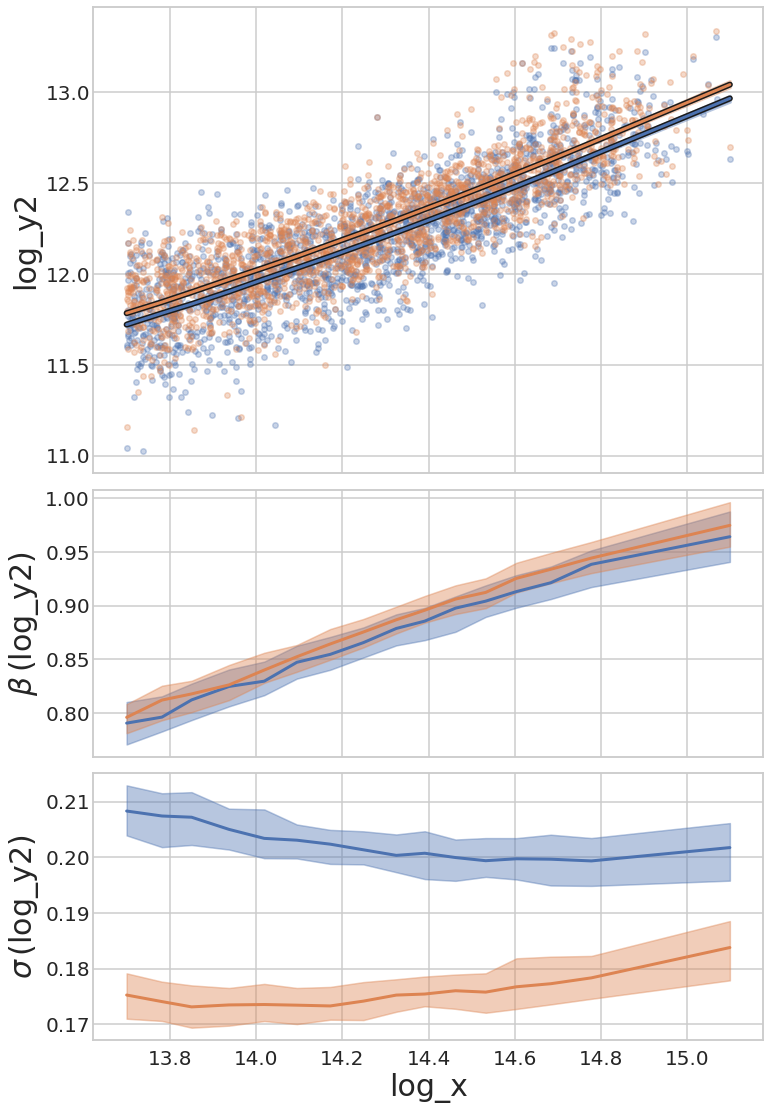

In [99]:
data, ax = Plot_Fit_Summary(df, 'log_x', 'log_y1', y_err=None, show_data=True, kernel_width = 0.46,bins=mybins)
data, ax = Plot_Fit_Summary(df, 'log_x', 'log_y2', y_err=None, show_data=True, kernel_width = 0.46,bins=mybins,ax=ax)

#ax[0].plot(xv,np.mean(y_exp,axis=0))
# plot_add_linmix(data['x'],res,ax)

In [101]:
data['slope']

array([0.79614253, 0.81220492, 0.81793004, 0.82633862, 0.84014578,
       0.85249349, 0.86438233, 0.87551004, 0.88688303, 0.89575289,
       0.90612644, 0.9123405 , 0.92538375, 0.9338575 , 0.94424929,
       0.97467297])

In [ ]:
lm = kllr_model(kernel_type = 'gaussian', kernel_width = 0.45)

out = lm.fit(df['log_x'], df['log_y1'], y_err=np.log10(np.array(df['y1err'])), bins=mybins)

xv, y_exp, intercept_exp, slope_exp, scatter_exp, _, _= out

In [114]:
mybins = np.logspace(np.min(df['log_x']),np.max(df['log_x']),16)

100%|██████████| 16/16 [00:01<00:00, 13.54it/s]


[]

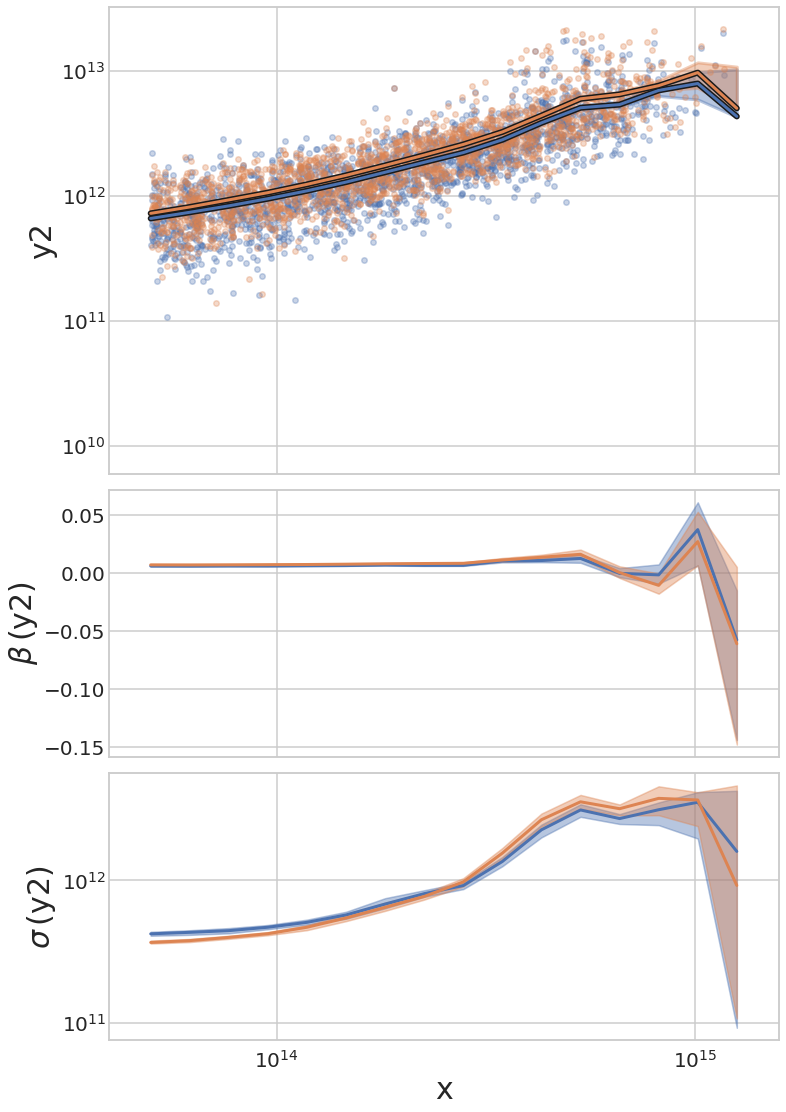

In [126]:
data, ax = Plot_Fit_Summary(df, 'x', 'y1', y_err=None, show_data='y1err', kernel_width = 0.46*1e14, bins=mybins)
data, ax = Plot_Fit_Summary(df, 'x', 'y2', y_err=None, show_data='y2err', kernel_width = 0.46*1e14, bins=mybins,ax=ax)

ax[0].loglog()
ax[0].set_xlim(10**13.6,10**15.2)
ax[2].loglog()
#ax[0].plot(xv,np.mean(y_exp,axis=0))
# plot_add_linmix(data['x'],res,ax)